In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


date : Wed Sep  4 23:43:39 PDT 2019
hostname : bragi
whoami : tmb
pwd : /home/tmb/exp/icdar2019-img



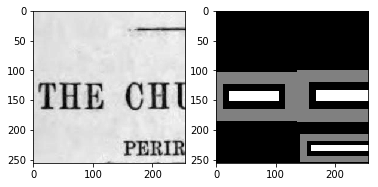

In [2]:
exec(open("startup.py").read())
images, targets, = next(iter(training_dl))
subplot(121); imshow(images[0,:,:,0]); subplot(122); imshow(targets[0])

In [3]:
import models; reload(models)
model = models.make("seg_lstm")
epoch, loss = models.load_latest(model)

loading models/seg_lstm-000-000441335.pth


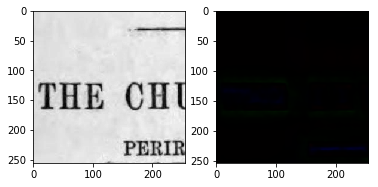

In [4]:
reload(helpers)
trainer = helpers.SegTrainer(model)
result = trainer.probs_batch(images).detach().cpu().numpy()[0].transpose(1, 2, 0)
subplot(121); imshow(asnp(images[0,:,:,0])); subplot(122); imshow(result)

In [5]:
!mkdir -p models

In [6]:
figsize(15, 5)

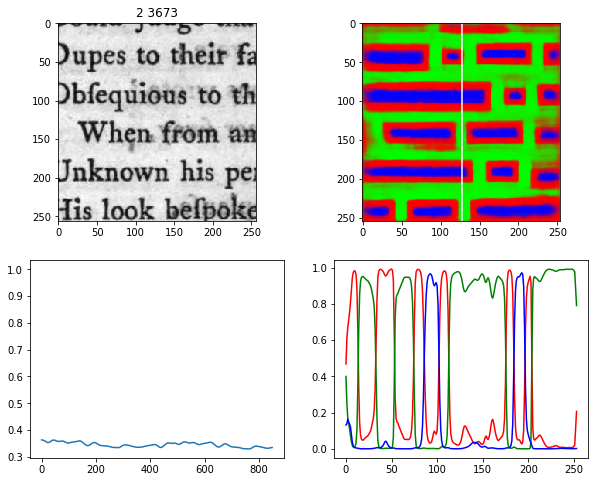

In [ ]:
reload(helpers)
trainer = helpers.SegTrainer(model, lr=[1e-3]+[1e-4])
trainer.train(training_dl, 20, start_epoch=epoch+1)
IPython.display.clear_output(wait=True)

In [ ]:
figsize(10, 10)
for i, batch in enumerate(islice(training_dl, 0, 10)):
    subplot(5, 2, i+1)
    result = trainer.predict_batch(*batch[:2], threshold=0.3)
    imshow(batch[0][0,:,:,0].detach().numpy())
    title(decode_str(result[0]))

In [ ]:
trainer.errors(testing_dl)